In [1]:
import pandas as pd 


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
import os

In [5]:
import os
def data_preparation(path):
    cwd = os.getcwd() 
    script = os.path.realpath(cwd)+"\\"+path
    data = pd.read_csv(script)
    X = data.iloc[:, 0].values.reshape(-1,1)
    y = data.iloc[:, 1].values
    return X,y

In [6]:
path="data\\train.csv"
X_train, Y_train = data_preparation(path=path)
X_train
X_train.shape

(500, 1)

In [7]:
X_train

array([[1.79],
       [0.05],
       [1.21],
       [1.26],
       [1.81],
       [1.6 ],
       [0.44],
       [0.81],
       [1.87],
       [0.04],
       [1.01],
       [1.28],
       [0.96],
       [1.08],
       [1.61],
       [1.17],
       [0.97],
       [1.21],
       [0.78],
       [1.61],
       [0.6 ],
       [0.56],
       [0.78],
       [1.32],
       [0.27],
       [1.01],
       [1.71],
       [0.91],
       [2.  ],
       [1.06],
       [0.59],
       [0.97],
       [1.57],
       [0.39],
       [0.73],
       [1.01],
       [1.35],
       [0.85],
       [0.51],
       [1.06],
       [0.52],
       [1.17],
       [1.22],
       [0.77],
       [0.95],
       [1.46],
       [1.72],
       [1.72],
       [0.  ],
       [0.34],
       [0.3 ],
       [0.23],
       [1.89],
       [1.89],
       [1.62],
       [1.19],
       [1.35],
       [1.98],
       [0.72],
       [0.8 ],
       [1.93],
       [0.55],
       [1.07],
       [0.55],
       [0.68],
       [1.67],
       [1.

In [24]:
class PolynomailRegression():
    """Base class for Linear Models"""

    def __init__(self, degree, learning_rate, iterations):
        self.degree = degree 
        self.learning_rate = learning_rate
        self.iterations = iterations
    def transform(self, X):
        X_transform = np.ones((self.row, 1)) 
        d=0
        for d in range(self.degree + 1):
            if d!=0:
                x_pow = np.power( X, d )
                 # append x_pow to X_transform
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
        return X_transform

    # function to normalize X_transform
    def normalize( self, X ) :
         
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
         
        return X

    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.row = self.X.shape[0]
     
        # weight initialization
     
        self.W = np.zeros(self.degree + 1)
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
        # normalize X_transform
         
        X_normalize = self.normalize( X_transform )
                 
        # gradient descent learning
     
        for i in range(self.iterations) :
             
            h = self.predict( self.X )
         
            error = h - self.Y
             
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.row ) * np.dot( X_normalize.T, error )
        return self
     
    # predict
     
    def predict( self, X ) :
        
     
        self.row,_= X.shape
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( X )
         
        X_normalize = self.normalize( X_transform )
        Y_pred =np.dot( X_transform, self.W )
         
        return Y_pred


(500, 1)
(500,)


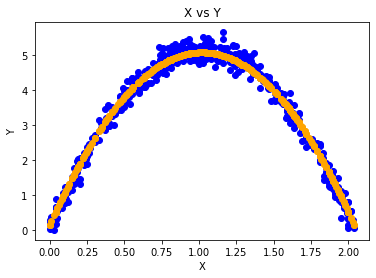

In [25]:
# def main() :   
     
    # Create dataset
     
X_train, Y_train = data_preparation("data/train.csv")
X_test, Y_test = data_preparation("data/test.csv")
# X_train = np.array( [ [1], [2], [3], [4], [5], [6], [7] ] )
    
# Y_train = np.array( [ 45000, 50000, 60000, 80000, 110000, 150000, 200000 ] )
# model training
    
model = PolynomailRegression( degree = 2, learning_rate = 0.01, iterations = 10000 )

model.fit( X_train, Y_train )
    
# Prediction on training set

Y_pred = model.predict( X_train )
print(X_train.shape)
print(Y_pred.shape)
    
# Visualization
    
plt.scatter( X_train, Y_train, color = 'blue' )

plt.scatter( X_train, Y_pred, color = 'orange' )
    
plt.title( 'X vs Y' )
    
plt.xlabel( 'X' )
    
plt.ylabel( 'Y' )
    
plt.show()
 
 
# if __name__ == "__main__" :
     
#     main()

In [26]:
import pickle

In [30]:
def save_model(model_name):
    cwd = os.getcwd() 
    script = os.path.realpath(cwd)+"\\"+"savemodel"
    if not os.path.exists(script):
        os.makedirs(script)
    script= script + "\\"+model_name+".pkl"
    pickle.dump(model, open(script, 'wb'))
save_model("model")

In [51]:
def load_model(path):
    cwd = os.getcwd() 
    script = os.path.realpath(cwd)+"\\"+path
    pickled_model = pickle.load(open(script,"rb"))
    return pickled_model
pickled_model = load_model("savemodel/model.pkl")
Y_test_pred=pickled_model.predict(X_test)

    
plt.show()

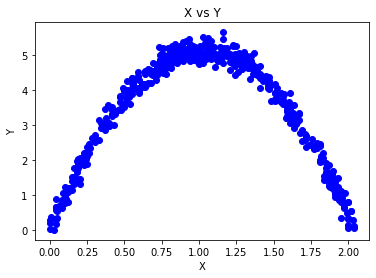

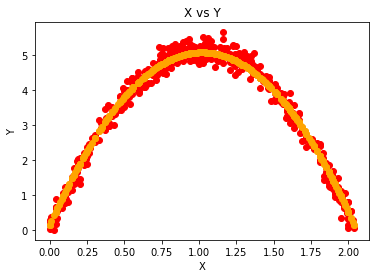

In [93]:
def visualize( X, Y, color, new_plot=False, figure=None):
    if new_plot:
        fig = plt.figure()
    else:
        fig = figure
    plt.scatter( X, Y, color = color )
    
    plt.title( 'X vs Y' )
    
    plt.xlabel( 'X' )
    
    plt.ylabel( 'Y' )
    return fig

f = visualize(X_train, Y_train, "blue", new_plot=True)

f = visualize(X_train, Y_train, "red", new_plot=True)

f1 = visualize(X_train, Y_pred, "orange", new_plot=False)